
### Part_2_Exposure_Profile_Simulator

In the realm of financial modeling, accurately forecasting future interest rates is crucial for effective risk management and the pricing of interest rate derivatives. Building upon the insights presented in the **Part_1_Exposure_Profile_Simulator** notebook, where I utilized Monte Carlo methods to explore the dynamics of interest rates through both the Geometric Brownian Motion (GBM) model and the Hull-White model, this **Part 2** aims to further enhance our simulation framework.

In this extension, I will incorporate two advanced modeling techniques: the Heston model for stochastic volatility and Merton's jump-diffusion model. The Heston model introduces a stochastic process for volatility, allowing for a more realistic representation of fluctuations in interest rates over time. Meanwhile, Merton's jump-diffusion model accounts for sudden and significant changes in interest rates, capturing the potential for jumps that can occur in financial markets.

By integrating these models, I aim to create a more comprehensive and robust simulation of future interest rates. This enhanced framework provides deeper insights into interest rate behavior, enabling improved risk assessment and decision-making in a complex financial landscape.




### 1. Monte Carlo Simulation for Future Interest Rates

The following code illustrates a Monte Carlo simulation for forecasting future interest rates. It employs the Geometric Brownian Motion (GBM) framework while incorporating both the Heston model for stochastic volatility and Merton's jump-diffusion model. This comprehensive approach allows for a more nuanced understanding of interest rate dynamics by accounting for volatility fluctuations and the potential for sudden jumps in rates.


In [1]:
import numpy as np

# Simulation Parameters
S0 = 0.02      # Initial short rate (starting interest rate, 2%)
mu = 0.01      # Drift (long-term average rate)
kappa = 0.1    # Rate of mean reversion for volatility
theta = 0.01   # Long-term average volatility
sigma_V = 0.02 # Volatility of volatility
lambda_jump = 0.1  # Intensity of the Poisson process for jumps
mu_jump = 0.0   # Mean of jump size
sigma_jump = 0.1 # Standard deviation of jump size
T = 1.0        # Time horizon (in years)
N = 252        # Number of time steps (daily)
M = 10000      # Number of Monte Carlo paths
dt = T / N     # Size of each time step (in years)

np.random.seed(42)  # For reproducibility

# Initialize arrays for simulated paths
short_rate_paths = np.zeros((M, N + 1))  # Create a 2D array M x (N+1) to store paths
volatility_paths = np.zeros((M, N + 1))   # Create a 2D array for volatility paths
short_rate_paths[:, 0] = S0                # Set first column (time 0) of all simulations to the starting rate S0
volatility_paths[:, 0] = theta              # Set initial volatility to long-term average

# Simulate paths using Heston model with Merton's jump-diffusion
for t in range(1, N + 1):
    Z1 = np.random.normal(0, 1, M)  # For short rate
    Z2 = np.random.normal(0, 1, M)  # For volatility
    jump = np.random.poisson(lambda_jump * dt, M)  # Poisson process for jumps
    jump_sizes = np.random.normal(mu_jump, sigma_jump, M) * jump  # Jump sizes

    # Update volatility using Heston model
    volatility_paths[:, t] = np.maximum(volatility_paths[:, t - 1] + 
                                         kappa * (theta - volatility_paths[:, t - 1]) * dt + 
                                         sigma_V * np.sqrt(np.maximum(volatility_paths[:, t - 1], 0)) * np.sqrt(dt) * Z2, 0)

    # Update short rate using Merton's jump-diffusion
    short_rate_paths[:, t] = short_rate_paths[:, t - 1] * np.exp(
        (mu - 0.5 * volatility_paths[:, t - 1]) * dt + 
        np.sqrt(volatility_paths[:, t - 1]) * np.sqrt(dt) * Z1 + 
        jump_sizes
    )

# Now short_rate_paths contains the simulated interest rate paths
# and volatility_paths contains the simulated volatility paths.


### Mathematical explanation: 

Improved Models of Geometric Brownian Motion (GBM):

Stochastic Volatility Models
- **Heston Model**: This model introduces stochastic volatility, allowing the volatility of the asset price to change over time. The Heston model is defined by two stochastic processes: one for the asset price and another for the volatility. This model captures the observed phenomenon of volatility clustering in financial markets.
  
  The dynamics are given by:
  $dS_t = \mu S_t dt + \sqrt{V_t} S_t dW_t^S$ and $dV_t = \theta(\kappa - V_t)dt + \sigma_V \sqrt{V_t} dW_t^V$

  where $V_t$ is the variance, $\theta$ is the long-term variance, $ \kappa$ is the rate of reversion, and $\sigma_V $ is the volatility of volatility.

Jump-Diffusion Models
- **Merton's Jump-Diffusion Model**: This model extends GBM by incorporating jumps in asset prices, which can occur due to sudden market events. The asset price follows a combination of a continuous diffusion process and a jump process.

  The dynamics are given by:
  $
  dS_t = \mu S_t dt + \sigma S_t dW_t + S_t (J - 1) dN_t
  $
  where $J$ represents the jump size and $N_t$ is a Poisson process that counts the number of jumps.





### 2. Monte Carlo Simulation of Interest Rates

The code below illustrates a Monte Carlo simulation for forecasting interest rates using the Hull-White model. This implementation also incorporates the Heston model for stochastic volatility and Merton's jump-diffusion model. By integrating these advanced modeling techniques, the simulation provides a comprehensive framework for understanding the dynamics of interest rates in a more realistic manner.


In [ ]:

# Simulation Parameters
S0 = 0.02      # Initial short rate (starting interest rate, 2%)
a = 0.1        # Speed of mean reversion
b = 0.01       # Long-term mean level of interest rate
sigma = 0.02   # Volatility of the interest rate
kappa = 0.1    # Rate of mean reversion for volatility (for Heston model)
theta = 0.01   # Long-term average volatility (for Heston model)
sigma_V = 0.02 # Volatility of volatility (for Heston model)
lambda_jump = 0.1  # Intensity of the Poisson process for jumps (for Merton model)
mu_jump = 0.0   # Mean of jump size (for Merton model)
sigma_jump = 0.1 # Standard deviation of jump size (for Merton model)
T = 1.0        # Time horizon (in years)
N = 252        # Number of time steps (daily)
M = 10000      # Number of Monte Carlo paths
dt = T / N     # Size of each time step (in years)

np.random.seed(42)  # For reproducibility

# Initialize arrays for simulated paths
short_rate_paths = np.zeros((M, N + 1))  # Create a 2D array M x (N+1) to store paths
volatility_paths = np.zeros((M, N + 1))   # Create a 2D array for volatility paths
short_rate_paths[:, 0] = S0                # Set first column (time 0) of all simulations to the starting rate S0
volatility_paths[:, 0] = theta              # Set initial volatility to long-term average

# Simulate paths using Hull-White model with Heston model and Merton's jump-diffusion
for t in range(1, N + 1):
    Z1 = np.random.normal(0, 1, M)  # For short rate
    Z2 = np.random.normal(0, 1, M)  # For volatility
    jump = np.random.poisson(lambda_jump * dt, M)  # Poisson process for jumps
    jump_sizes = np.random.normal(mu_jump, sigma_jump, M) * jump  # Jump sizes

    # Update short rate using Hull-White model
    short_rate_paths[:, t] = short_rate_paths[:, t - 1] + \
        a * (b - short_rate_paths[:, t - 1]) * dt + \
        sigma * np.sqrt(dt) * Z1

    # Update volatility using Heston model
    volatility_paths[:, t] = np.maximum(volatility_paths[:, t - 1] + 
                                         kappa * (theta - volatility_paths[:, t - 1]) * dt + 
                                         sigma_V * np.sqrt(np.maximum(volatility_paths[:, t - 1], 0)) * np.sqrt(dt) * Z2, 0)

    # Update short rate with Merton's jump-diffusion
    short_rate_paths[:, t] += jump_sizes  # Add jumps to the short rate

# Now short_rate_paths contains the simulated interest rate paths
# and volatility_paths contains the simulated volatility paths.


### Mathematical Explanation

 **Hull-White Model**:

$dr_t = a(b - r_t)dt + \sigma dW_t $

where

- `a: speed of mean reversion
- `b: long-term average rate
- `σ : volatility
- `r0: initial rate, based on market (e.g., SOFR)





### Explanation

1. **Hull-White Parameters**: The parameters a, b, and $\sigma$ are defined at the beginning of the code.

2. **Short Rate Update**: The short rate is updated using the Hull-White model equation, which incorporates the mean-reverting behavior.

3. **Jump Addition**: The jump sizes from Merton's model are added to the short rate after the Hull-White update.



### Visualization

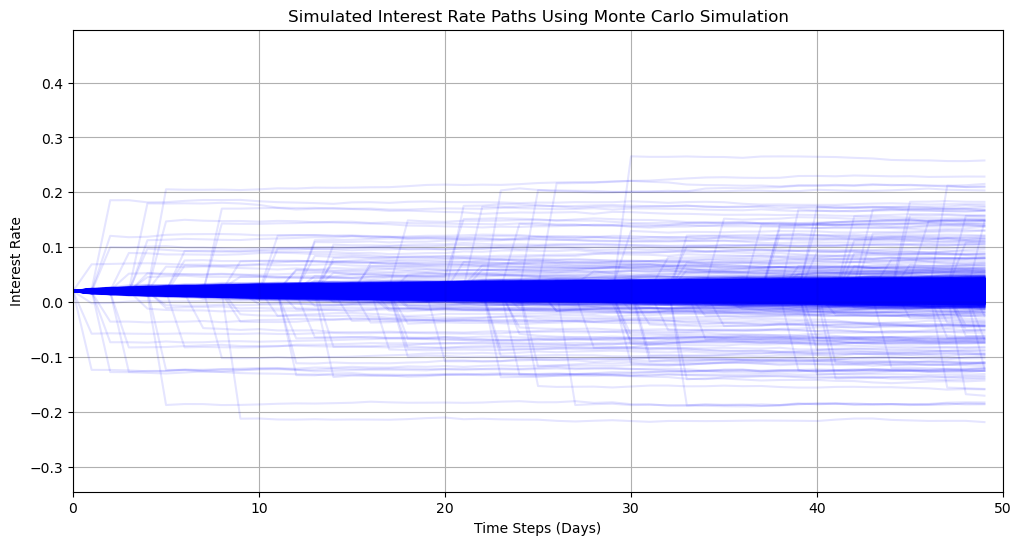

In [5]:
import matplotlib.pyplot as plt

# Plotting the simulated interest rate paths
plt.figure(figsize=(12, 6))
plt.plot(short_rate_paths[:, :50].T, color='blue', alpha=0.1)  # Plot the first 50 paths for clarity
plt.title('Simulated Interest Rate Paths Using Monte Carlo Simulation')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Interest Rate')
plt.grid()
plt.xlim(0, 50)  # Limit x-axis to the first 50 time steps
plt.ylim(np.min(short_rate_paths), np.max(short_rate_paths))  # Limit y-axis to the range of simulated rates
plt.show()



### Conclusion

By extending our Monte Carlo simulation to incorporate the Hull-White model, along with the Heston model for stochastic volatility and Merton's jump-diffusion model, I have developed a more robust framework for simulating interest rates. This comprehensive approach effectively captures the essential characteristics of interest rate behavior, including mean reversion, stochastic volatility, and the potential for sudden jumps.

The enhanced simulation provides valuable insights into the dynamics of interest rates, enabling improved risk assessment and decision-making in a complex financial landscape. The power of Monte Carlo methods lies in their flexibility, allowing for the incorporation of various models and assumptions, which can be tailored to specific market conditions and scenarios. This adaptability makes Monte Carlo simulations an invaluable tool for practitioners in the field, facilitating a deeper understanding of interest rate movements and their implications.

